# [과제] 

신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이 Target 값으로 연체일 경우 1, 정상납부가 0임.
PCA 데이터 세트에 기반한 신용카드 고객 연체 여부 분류 예측을 아래와 같이 수행하세요.
- 독립변수간 상관도를 시각화
- 독립변수간 상관도가 0.9인 속성 6개를 2개의 PCA 컴포넌트 변환 뒤 교차 검증(CV=3) 하여 변환 후 이전의 정확도와 비교
        
        변수 6개 만 선택하여 그걸 2개의 pCA컴포넌트로 변환. 그러면 두개로 바뀌는까 그것들을 교참검증해라
- 6개의 PCA컴포넌트 변환 뒤 교차검정(cv=3)하여 변환 후 이전의 정확도와 비교

###### module import

In [1]:
# basic module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sepearte module
from sklearn.model_selection import train_test_split

# preprocessing module
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# machine Learning modules (classification)
from sklearn.ensemble import RandomForestClassifier

# machine Learning evaluation

from sklearn.model_selection import cross_val_score

# Developing
from sklearn.model_selection import GridSearchCV

## Load data

In [2]:
credit = pd.read_excel('Data/credit_card.xls',header=1).iloc[0:,1:]
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### data_info

In [3]:
def data_info(df):
    display(df.head(2))
    print('[shape] : ',df.shape)
    print('[rows] : {} , [columns] : {}'.format(df.shape[0],df.shape[1]),'\n')
    print('[house_value_counts] : ',df.dtypes.value_counts(),'\n')
    print('[columns] : ' ,df.columns,'\n')
    nl_v = df.isnull().sum()
    print('[Null_values] : ',nl_v[nl_v>0].sort_values(ascending=False))
    
data_info(credit)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


[shape] :  (30000, 24)
[rows] : 30000 , [columns] : 24 

[house_value_counts] :  int64    24
dtype: int64 

[columns] :  Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object') 

[Null_values] :  Series([], dtype: int64)


### get_corr_

AxesSubplot(0.125,0.125;0.62x0.755)
MARRIAGE                    AGE                          -0.414170
AGE                         MARRIAGE                     -0.414170
PAY_2                       LIMIT_BAL                    -0.296382
LIMIT_BAL                   PAY_2                        -0.296382
                            PAY_3                        -0.286123
                                                            ...   
PAY_AMT2                    PAY_AMT2                      1.000000
PAY_AMT3                    PAY_AMT3                      1.000000
PAY_AMT4                    PAY_AMT4                      1.000000
BILL_AMT1                   BILL_AMT1                     1.000000
default payment next month  default payment next month    1.000000
Length: 576, dtype: float64

 MARRIAGE                    AGE                          -0.414170
AGE                         MARRIAGE                     -0.414170
PAY_2                       LIMIT_BAL                    -0.296

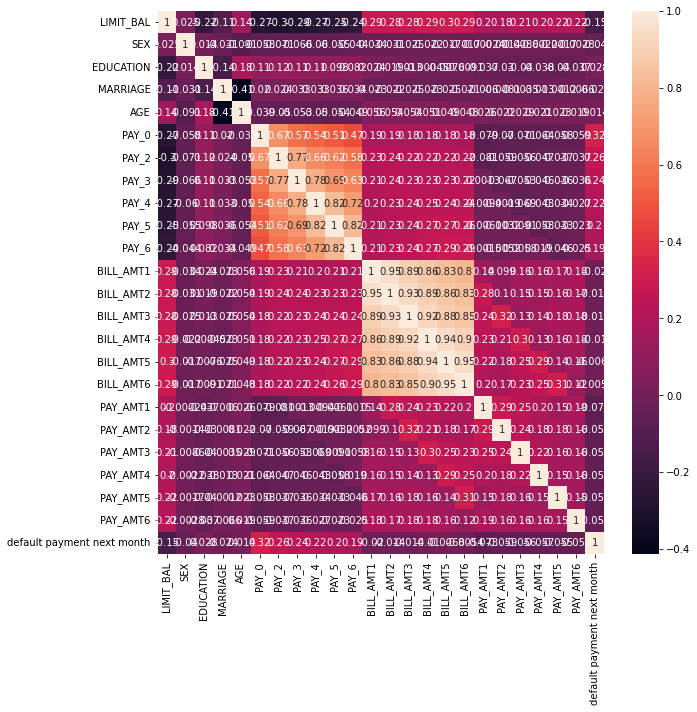

In [4]:
def get_corr(df, upper_condition_n, most_up_condition_n):
    cr = df.corr()
    plt.figure(figsize=(10,10))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    print(cr_v)
    print('\n',cr_v,'\n')
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())
get_corr(credit,0.9,1)

### Preprocessing

In [5]:
credit = credit.rename(columns={'default payment next month':'target'})
credit['target']

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: target, Length: 30000, dtype: int64

## Seperate

In [6]:
X = credit.drop('target',axis=1)
y = credit['target']

In [7]:
bils_list = ['BILL_AMT6', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT1']
X_l = X[bils_list]

## Q_1

### Non_pca

#### visualization

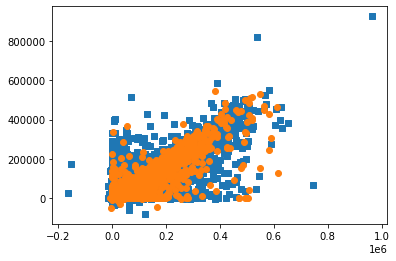

In [8]:
markers = ['s','o','^','P','D','H','X']
target_list=[0,1]
for target in target_list:
    x_axis_data = credit[credit.target==target]['BILL_AMT1']
    y_axis_data = credit[credit.target==target]['BILL_AMT5']
    plt.scatter(x_axis_data,y_axis_data,marker=markers[target])

#### train_test_split 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_l,y,test_size=0.3,random_state=156)

#### Machine Learning model import

In [10]:
rf = RandomForestClassifier()

#### Fitting

In [11]:
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Predicting

In [12]:
rf_pred = rf.predict(X_test)

#### Evaluation

In [13]:
def Cross_val_score_eval(model_name,X,y,n_cv):
    neg_mse_score = cross_val_score(model_name,X,y,scoring="neg_mean_squared_error",cv=n_cv)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse=np.mean(rmse_score)
    print('[model]:',model_name,'\n')
    print(f'{n_cv} folds independent Negative MSE scores:', np.round(neg_mse_score,2))
    print(f'{n_cv} folds in denpendent RMSE scores:', np.round(rmse_score,2))
    print('{} folds Mean RMSE: {:.3f}'.format(n_cv,avg_rmse))
    print('---' * 30)
    score = cross_val_score(model_name,X,y,scoring='accuracy',cv=n_cv)
    print('accuracy', score)
    print('mean_accuracy',np.mean(score))
    print('===' * 30)
    
Cross_val_score_eval(rf,X_l,y,3)

[model]: RandomForestClassifier() 

3 folds independent Negative MSE scores: [-0.23 -0.23 -0.22]
3 folds in denpendent RMSE scores: [0.48 0.48 0.47]
3 folds Mean RMSE: 0.478
------------------------------------------------------------------------------------------
accuracy [0.7706 0.7716 0.7737]
mean_accuracy 0.7719666666666667


### Pca

In [14]:
def pca_standard(X_features,n_pca):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    scaler = StandardScaler()
    df_scd = scaler.fit_transform(X_features)
    pca = PCA(n_components=n_pca)
    global df_pca
    df_pca = pca.fit_transform(df_scd)
    print(df_pca.shape)
    evr = pca.explained_variance_ratio_
    print('pca_component_1 : ', evr[0])
    print('pca_component_2 : ', evr[1])
    
    
pca_standard(X_l,2)

df_pca[1:5]

(30000, 2)
pca_component_1 :  0.9055525253986833
pca_component_2 :  0.05098670119241613


array([[-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       [-0.25071237,  0.17437371],
       [-0.96895076, -0.21303188]])

#### pca_DF

In [15]:
pca_columns= ['pca_component_1','pca_component_2']
df_Pca= pd.DataFrame(df_pca, columns=pca_columns)
df_Pca['target']= credit.target
df_Pca.head(1)

,pca_component_1,pca_component_2,target
0,-1.611148,0.012479,1


#### pca_Visualization

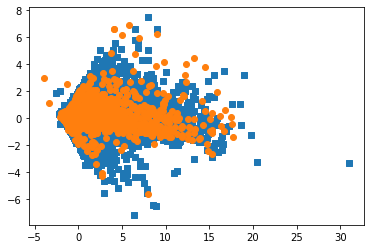

In [16]:
markers = ['s','o']
for i,marker in enumerate(markers):
    x_axis_data = df_Pca[df_Pca.target==i]['pca_component_1']
    y_axis_data = df_Pca[df_Pca.target==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)

#### pca_seperate

In [17]:
X_pca = df_Pca.drop('target',axis=1)
y_pca = df_Pca['target']

#### pca_train_test_split

In [18]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca,test_size=0.3,random_state=156)

#### machine Learning model - RandomForest

In [19]:
pc_rf = RandomForestClassifier()

#### pca_fitting

In [20]:
pc_rf.fit(X_train_pca,y_train_pca)

RandomForestClassifier()

#### pca_predicting

In [21]:
pc_rf_pred = pc_rf.predict(X_test_pca)

#### pca_evaluation

In [22]:
Cross_val_score_eval(pc_rf,X_pca,y_pca,3)

[model]: RandomForestClassifier() 

3 folds independent Negative MSE scores: [-0.25 -0.25 -0.25]
3 folds in denpendent RMSE scores: [0.5 0.5 0.5]
3 folds Mean RMSE: 0.501
------------------------------------------------------------------------------------------
accuracy [0.7456 0.7516 0.7508]
mean_accuracy 0.7493333333333334


### Conclusion

- original
[mean_accuracy 0.7722333333333333]
- after PCA
[mean_accuracy 0.7482333333333333]

## Q_2

### orginal columns

#### og_visualization

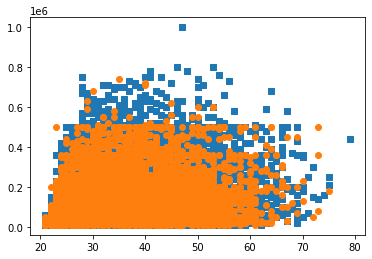

In [23]:
markers = ['s','o']
for i,marker in enumerate(markers):
    x_axis_data = credit[credit.target==i]['AGE']
    y_axis_data = credit[credit.target==i]['LIMIT_BAL']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)

#### og_train_test_split

In [24]:
X_train_og,X_test_og,y_train_og,y_test_og = train_test_split(X,y,test_size=0.3,random_state=156)

#### machine Learning model RandomForeset

In [25]:
og_rf = RandomForestClassifier()

#### Fitting

In [26]:
og_rf.fit(X_train_og,y_train_og)

RandomForestClassifier()

#### Predicting

In [27]:
og_rf_pred = og_rf.predict(X_test_og)

#### Evaluation

In [28]:
Cross_val_score_eval(og_rf,X,y,3)

[model]: RandomForestClassifier() 

3 folds independent Negative MSE scores: [-0.19 -0.18 -0.18]
3 folds in denpendent RMSE scores: [0.44 0.42 0.42]
3 folds Mean RMSE: 0.428
------------------------------------------------------------------------------------------
accuracy [0.8095 0.8198 0.8221]
mean_accuracy 0.8171333333333334


### pca

In [29]:
def pca_standard(X_features,n_pca):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    scaler = StandardScaler()
    df_scd = scaler.fit_transform(X_features)
    pca = PCA(n_components=n_pca)
    global df_pca # 변수 사용 됨.
    df_pca = pca.fit_transform(df_scd)
    print(df_pca.shape)
    evr = pca.explained_variance_ratio_
    print('pca_component_1 : ', evr[0])
    print('pca_component_2 : ', evr[1])
    
    
pca_standard(X,6)

df_pca[1:5]

(30000, 6)
pca_component_1 :  0.28448214525609977
pca_component_2 :  0.1781881698470555


array([[-0.76469658, -2.10925691,  1.09892444, -0.48335551,  0.85455619,
        -0.23133586],
       [-0.84740796, -1.07217673,  0.41230032, -0.43355359,  0.77010478,
         0.01902905],
       [-0.19658869, -0.80901805, -0.81845915,  0.29289118,  0.90889246,
        -0.28422253],
       [-0.84093442, -0.07252585, -1.00474979,  2.32807061, -1.02511992,
         0.7964718 ]])

#### pca_DF

In [30]:
pca_columns= ['pca_component_1','pca_component_2','pca_component_3',
             'pca_component_4','pca_component_5','pca_component_6']
df_Pca= pd.DataFrame(df_pca, columns=pca_columns)
df_Pca['target']= credit.target
df_Pca.head(1)

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,target
0,-1.887963,-0.906105,-0.487796,-0.539989,0.997426,0.044761,1


#### pca_visualization

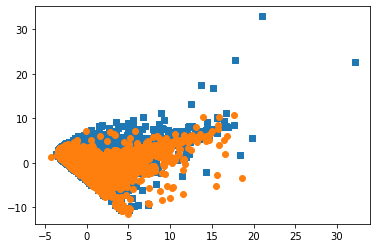

In [31]:
markers = ['s','o']
for i,marker in enumerate(markers):
    x_axis_data = df_Pca[df_Pca.target==i]['pca_component_1']
    y_axis_data = df_Pca[df_Pca.target==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)

#### pca_seperate

In [32]:
X_pca = df_Pca.drop('target',axis=1)
y_pca = df_Pca['target']

#### pca_train_test_split

In [33]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca,
                                                                   test_size=0.3,
                                                                   random_state=156)

#### machine Learning model Randomforest

In [34]:
pc_rf = RandomForestClassifier()

#### Fitting

In [35]:
pc_rf.fit(X_train_pca, y_train_pca)

RandomForestClassifier()

#### Predicting

In [36]:
pc_rf_pred = pc_rf.predict(X_test_pca)

#### Evaluation

In [37]:
Cross_val_score_eval(pc_rf,X_pca,y_pca,3)

[model]: RandomForestClassifier() 

3 folds independent Negative MSE scores: [-0.21 -0.2  -0.2 ]
3 folds in denpendent RMSE scores: [0.46 0.45 0.45]
3 folds Mean RMSE: 0.451
------------------------------------------------------------------------------------------
accuracy [0.7903 0.7972 0.7993]
mean_accuracy 0.7956


### Conclusion

- original
[mean_accuracy 0.8169333333333334]
- after PCA
[mean_accuracy 0.7953000000000001]

# [과제2]
아래 dataset으로 연관성 분석을 수행하세요.

###### module import

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Dataset

In [39]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Ice cream', 'Eggs']]

## Encoder module import

In [40]:
te = TransactionEncoder()

## fitting

In [41]:
te_ary = te.fit_transform(dataset)

## Dataframe

In [42]:
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,Apple,Corn,Eggs,Ice cream,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,True,False,True,True,True,False,True
1,False,False,True,False,False,True,True,False,True
2,True,False,True,False,True,False,False,False,False
3,False,True,False,False,True,False,False,True,True
4,False,True,True,True,False,False,True,False,False


## support 0.5

In [43]:
frequent_itemsets = apriori(df,min_support=0.5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Milk)
2,0.6,(Onion)
3,0.6,(Yogurt)
4,0.6,"(Onion, Eggs)"


## Confidence 0.3

In [44]:
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
